<a href="https://colab.research.google.com/github/rges-pit/minicourses/blob/main/chapter4/Day4_Gould_Loeb_planetary_event.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font face="Helvetica" size="7">Chapter 4: Estimating stellar and planetary parameters based on visual inspection </font>  

<hr style="border: 1.5pt solid #a859e4; width: 100%; margin-top: -10px;">

<i> Authors: Katarzyna Kruszyńska, Amber Malpas, Etienne Bachelet, Somayeh Khakpash, Ali Crisp </i>

<br>

If you would like an introduction to python notebooks, please read this tutorial: https://medium.com/codingthesmartway-com-blog/getting-started-with-jupyter-notebook-for-python-4e7082bd5d46

Please note, you must **save this notebook in a space owned by you** (a GitHub repo, gist, to Google Drive, or locally) if you want to come back to it later without losing your progress. You can edit and run this notebook on Colab, but it **will not auto save** for you.

### <font face="Helvetica" size="5"> Running locally and local runtimes </font>

*Ignore this section if you already did these steps for another notebook.*

If you choose to use lcoal resources your notebook will use your local packages, so you should install a virtual environment with the following packages. Run the cell below to create a downloadable `.yml` file, to automate the package install process (provided you are using anaconda). Failing that, you can download it from the [git repository](https://github.com/rges-pit/minicourses.git).

In [1]:
# @title `.yml`
yaml = '''name: minicourse
channels:
  - conda-forge
dependencies:
  - python=3.11
  - numpy
  - matplotlib
  - pandas
  - scipy
  - jupyter
  - ipython
  - astropy
  - beautifulsoup4
  - lxml              # required parser for bs4
  - pip
  - pip:
      - pathos
      - MulensModel
      - pyLIMA'''

# save the yaml
with open('environment.yml', 'w') as f:
    f.write(yaml)

Click the folder button on the side bar to open the file explorer. The file `environment.yml` should be in there now. Just click the triple dots on the side and then `Download` to download the `.yml` file.

```bash
conda env create -f environment.yml
```

Running the above line in a terminal (Anaconda Prompt on Windows) will create a virtual conda environment called `minicourse`, which has the required packages installed.

You can activate the environment with:

```bash
conda activate minicourse
```

From here you have two options

1. You can open the notebook running
```bash
jupyter notebook
```
from a parent folder to your locally saved version of this notebook and navigating to the notebook in your browser. You may need to select `minicourse` as your kernel before running the notebook.

2. Alternatly, you can create a local "Runtime" and for your Colab notebook by following [these instructions](https://www.google.com/url?q=https%3A%2F%2Fresearch.google.com%2Fcolaboratory%2Flocal-runtimes.html).
```bash
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --no-browser
```

  ⚠️ We don't generally recommend that you do this with notebooks that you didn't write as it give them access to your local machine

<!-- -->

### <font face="Helvetica" size="5"> Clone the rges-pit/minicourses repo </font>

Do this weather you are running locally or on the cloud, if you do not already have the repo cloned. It has necessary data.

In [2]:
# #@title Clone the rges-pit/minicourses repo
!git clone https://github.com/rges-pit/minicourses.git

Cloning into 'minicourses'...
remote: Enumerating objects: 712, done.
remote: Counting objects: 100% (220/220), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 712 (delta 144), reused 153 (delta 99), pack-reused 492 (from 2)
Receiving objects: 100% (712/712), 123.99 MiB | 13.55 MiB/s, done.
Resolving deltas: 100% (289/289), done.
Updating files: 100% (211/211), done.


In [3]:
!ls -a ./minicourses/
%cd minicourses/
!git status

.          .git       LICENSE    chapter1   chapter3   chapter5
..         .gitignore README.md  chapter2   chapter4   trials
/Users/gregcc/Documents/GitHub/SURP25/REU Vanderbilt/minicourses
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [4]:
!git pull
!git status

hint: Pulling without specifying how to reconcile divergent branches is
hint: discouraged. You can squelch this message by running one of the following
hint: commands sometime before your next pull:
hint: 
hint:   git config pull.rebase false  # merge (the default strategy)
hint:   git config pull.rebase true   # rebase
hint:   git config pull.ff only       # fast-forward only
hint: 
hint: You can replace "git config" with "git config --global" to set a default
hint: preference for all repositories. You can also pass --rebase, --no-rebase,
hint: or --ff-only on the command line to override the configured default per
hint: invocation.
Already up to date.
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


## <font face="Helvetica" size="6"> 1. Introduction </font>

<hr style="border: 1.5pt solid #a859e4; width: 100%; margin-top: -10px;">

Weolcome to **Chapter 4: Estimating stellar and planetary parameters based on visual inspection**




This exercise was adapted into a Jupyter Notebook from the exercise from Sagan Summer Exoplanet Workshop 2017, made by Jennifer Yee. See Tuesday's hands-on materials and accompanying worksheet available here: [**link**](https://nexsci.caltech.edu/workshop/2017/handson.shtml)

We will analyze one of the simplest cases of a microlensing event with a planetary anomaly, which was described in [**Gould & Loeb, 1992**](https://ui.adsabs.harvard.edu/abs/1992ApJ...396..104G/abstract).

We make a couple of assumptions here. We are trying to analyze a Gould & Loeb planetary event with a caustic crossing perturbation. In such an event, we assume that there is **no parallax** and **no blending**.

## <font face="Helvetica" size="6"> 2. Set-up </font>

<hr style="border: 1.5pt solid #a859e4; width: 100%; margin-top: -10px;">

### <font face="Helvetica" size="5"> 2.1 Load the packages </font>

We will start be getting out runtime/kernel set up with all the necessary packages

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# matplitlib widget unfortunately doesn't work with Google Collab :(
# %matplotlib widget

### <font face="Helvetica" size="5"> 2.2 Load the data and display the event </font>

Please select a number from 1 to 17. This will load one of the events. If possible, let each person select a different number.

In [7]:
##########################
# Put in your number here
my_number = 3
##########################
data = np.loadtxt('chapter4/data/roman_w146_%02d.dat'%my_number)

Go ahead and zoom in at the features of the event.

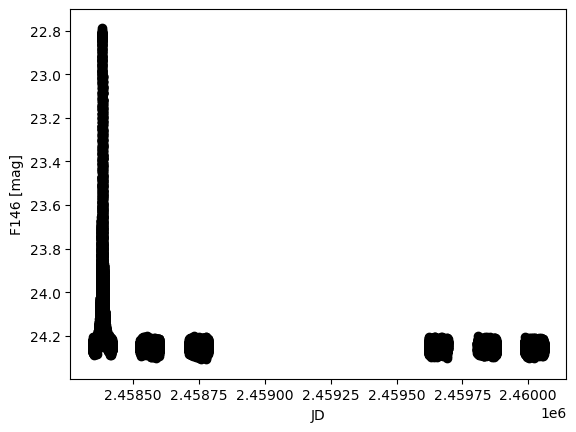

In [8]:
#@title Plot the event

fig = plt.figure()
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='o', color='black', ls='');
plt.gca().invert_yaxis();
plt.xlabel('JD');
plt.ylabel('F146 [mag]');

## <font face="Helvetica" size="6"> 3. Parameters that we will estimate </font>

<hr style="border: 1.5pt solid #a859e4; width: 100%; margin-top: -10px;">

Let's have a quick reminder about the main parameters that characterize a microlensing event. We will use this plot from [**Khakpash et al. 2019**](https://ui.adsabs.harvard.edu/abs/2019AJ....158....9K/abstract):

<center><img src="https://github.com/rges-pit/minicourses/blob/main/chapter4/images/Khakpash_2019_parameters.png?raw=true" width="500"/></center>
<center>Plot from Khakpash et al. 2019, Figure 1.</center>

This plot's y-axis is in **magnification**, instead of magnitudes or fluxes. Then the event's amplitude will be the maximum magnification, $A_\text{max}$. Time of peak $t_0$, or time of closest approach, will be the time when magnification reaches $A_\text{max}$. Then, the time of planetary anomaly $t_\text{p}$ will be the time when the anomaly is occuring. The timescale of the anomaly, $t_\text{E,p}$, is half of the time of the duration of the planetary anomaly, while the Einstein timescale $t_\text{E}$ will be half of the duration of when the event's magnification is larger than $A=1.34$.

Now let's talk about the other event parameters. You should be familiar with the source radius scaled in Einstein radii, $\rho$, from the Chapter 3 lecture on the finite source effect. Below, we present an illustration of parameters connected to the binary lens model: planet-star separation $s$ and the angle of the source trajectory $\alpha$.

<center><img src="https://github.com/rges-pit/minicourses/blob/main/chapter4/images/Yee_sagan_planet_params.png?raw=true" width="500"/></center>
<center>Plot from Jennifer Yee's presentation during the Sagan Exoplanet Workshop 2017 for this exercise.</center>

The final parameter connected to the binary lens we will need to define is the mass ratio $q$, which is defined as:

$q = \frac{M_\text{planet}}{M_\text{source}}$

## <font face="Helvetica" size="6"> 4. Parameters of the stellar event </font>

<hr style="border: 1.5pt solid #a859e4; width: 100%; margin-top: -10px;">

First, we will determine the parameters of the stellar events, ignoring the planetary anomaly.

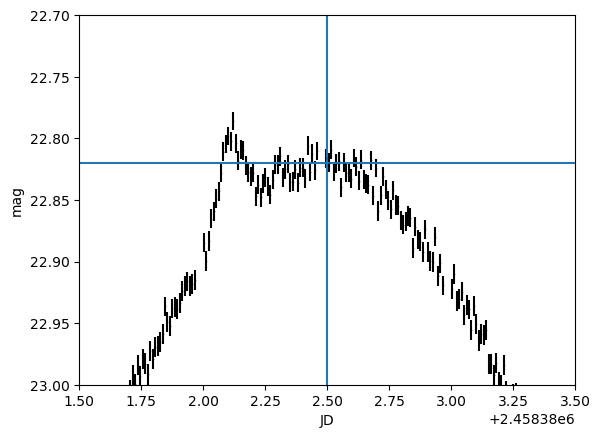

In [31]:
fig = plt.figure()
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='o', color='black', ls='', markersize = 0.2);
plt.gca().invert_yaxis();
plt.xlabel('JD');
plt.ylabel('mag');

plt.xlim(2458381.5, 2458383.5)
plt.ylim(23, 22.7)
plt.axvline(x=2458382.5);
plt.axhline(y=22.82);

We have to determine several parameters:
- t_0 is the time of the peak of the main event,
- mag_0 is the magnitude of the event at baseline,
- delta_mag_max is the amplitude between the baseline and the main event's peak,
- A_max is the amplification at the peak of the main event,
- u_0 is the impact parameter at the peak of the main event.

Use the plot above to find those values. You can help yourself with the vertical and horizontal lines, by editing their positions.

In [36]:
# Time of the peak of the event
t_0 = 2458382.5

# Baseline magnitude
mag_0 = 24.25

# Change in magnitude
delta_mag_max =np.abs(mag_0 - 22.82)

peak_mag = 22.82

# Maximum magnification
A_max = 10**(0.4 * (mag_0-peak_mag))

# Impact parameter
u_0 = 1/A_max

print(A_max, u_0)

3.7325015779572053 0.26791683248190323


Now, we'd like to determine the Einstein timescale, t_E.

First, you have to find what the amplitude is when the amplification A is equal to 1.34. That is when the source is at the Einstein radius $\theta_E$.

Once you found the amplitude delta_mag at $A=1.34$, you can use the plot above to find the time when this amplitude is reached. Then, you can subtract that value from the time of peak and get the Einstein timescale, t_E.

In [ ]:
# Change in magnitude for A = 1.34
delta_mag =
# Time at delta_mag
t =
# Einstein timescale
t_E = np.abs(t_0 - t)

## <font face="Helvetica" size="6"> 5. Parameters of the planet </font>

<hr style="border: 1.5pt solid #a859e4; width: 100%; margin-top: -10px;">  

Now we will focus on the planetary anomaly.

In [ ]:
fig = plt.figure()
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='o', color='black', ls='');
plt.gca().invert_yaxis();
plt.xlabel('JD');
plt.ylabel('mag');

## You can use the vertical and horizontal lines to find the values of the parameter
plt.axvline(x=2460900.);
plt.axhline(y=20.5);

### <font face="Helvetica" size="5"> 5.1 Where is the planet? </font>

First we have to find t_planet, the time when the planetary anomaly occurs. Use the plot above to determine that.

In [ ]:
# Time of the planet perturbation
t_planet =

Now, based on the information gained above we can find the position of the images.

In [ ]:
# Time scaled to the Einsein timescale
tau = np.abs(t_planet - t_0) / t_E

# source-lens separation
u = np.sqrt(u_0**2 + tau**2)

# Position of the images
y_plus = 0.5 * np.sqrt(u**2 + 4.) + u
y_minus = 0.5 * np.sqrt(u**2 + 4.) - u

### <font face="Helvetica" size="5"> 5.2 Find planet-star separation and the angle of the source trajectory </font>

To find the planet-star separation, we have to determine whether minor or major images are perturbed.

- Minor image perturbation occurs when there is a dip in the light curve during a planetary anomaly.

If the minor image is perturbed: $s = y_-$.

<center><img src="https://github.com/rges-pit/minicourses/blob/main//chapter4/images/Yee_sagan_minor_pert.png?raw=true" width="500"/></center>
<center>Minor image perturbation light curve, plot from Jennifer Yee's presentation during the Sagan Exoplanet Workshop 2017 for this exercise.</center>

- Major image perturbation occurs when there is a bump in the light curve during a planetary anomaly.

If the major image is perturbed: $s = y_+$

<center><img src="https://github.com/rges-pit/minicourses/blob/main/chapter4/images/Yee_sagan_major_pert.png?raw=true" width="500"/></center>
<center>Major image perturbation light curve, plot from Jennifer Yee's presentation during the Sagan Exoplanet Workshop 2017 for this exercise.</center>



⚠️ If your bump has a little dip that doesn't go back to the level of the main event, it would still be a major image perturbation rather than a minor image perturbation. The dip between two peaks can occur when the source is travelling inside the major image caustic.

In [ ]:
# planet-star separation
s =

Now we can find the value of the angle of the source trajectory, alpha, using values we determined earlier. Due to different geometric conventions, the correct value might be $\frac{\pi}{2}$ or $\pi$ away from the value you calculated.

In [ ]:
# angle between trajectory and binary axis
alpha = np.atan(u_0 / tau)

### <font face="Helvetica" size="5"> 5.3 Find  source radius and planet-star mass ratio </font>

Finding the planet-mass ratio and source radius depends on the event regime. First, you have to identify to which regime your event belongs.

If your event has a minor image perturbation, move to the [**Minor**](####-Minor-image,-rho-<-caustic) section.

If your event has a major image perturbation, you have to determine whether the source radius is larger or smaller than the caustic.
- If there are two distinct peaks, move to the [**Major, $\rho$< caustic**](####-Major-image,-rho-<-caustic) section.
- If there are no dips and the peaks are merged, move to the [**Major, $\rho$> caustic**](####-Major-image,-rho->-caustic) section.

<center><img src="https://github.com/rges-pit/minicourses/blob/main/chapter4/images/Yee_sagan_regimes.png?raw=true" width="500"/></center>
<center>Three regimes, this figure comes from Jennifer Yee's presentation for this exercise at the Sagan Summer Exoplanet Workshop 2017.</center>

#### <font face="Helvetica" size="4"> Minor image, $\rho$ < caustic </font>

In this case, there is a dip in your light curve. $\rho$ is smaller than the caustic.
We will follow [**Han, 2006**](https://ui.adsabs.harvard.edu/abs/2006ApJ...638.1080H/abstract).
Look at Figure 2 from this paper. This is how the caustics look in your case.

<center><img src="https://github.com/rges-pit/minicourses/blob/main/chapter4/images/Han_2006_minor.png?raw=true" width="500"/></center>
<center>Minor image perturbation caustics, Han, 2006, Figure 2.</center>

The minor image caustic is shaped like two triangles.

You will have to now estimate the path of the source through the caustic(s). Use the alpha angle you determined earlier and the features in the light curve.
- How many caustic crossings are there? They manifest as sharp spikes in magnitude.
- Where is the dip? How long does it last?

First, we will find the source radius in Einstein radii.
We have to estimate the duration of the caustic crossing feature in the light curve.
If there's more than one, focus on one of them.

In [ ]:
fig = plt.figure()
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='o', color='black', ls='');
plt.gca().invert_yaxis();
plt.xlabel('JD');
plt.ylabel('mag');

## You can use vertical lines to find the values of the parameter
plt.axvline(x=2460000.);
plt.axvline(x=2460050.);

In [ ]:
# length of one caustic feature
delta_t_caustic = 0. # Time it takes the source to cross the caustic
t_star = delta_t_caustic / 2.

# Now we can determine rho
rho = t_star / t_E

Now we will find the planet-star mass ratio, q. We will use the simplified equation (equation number 4 from the [**Handy equations**](###-Handy-equations) section).

Have a look at the length of the anomaly in the light curve. It occurs when the source is travelling between the two caustic triangles.

In [ ]:
fig = plt.figure()
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='o', color='black', ls='');
plt.gca().invert_yaxis();
plt.xlabel('JD');
plt.ylabel('mag');

## You can use vertical lines to find the values of the parameter
plt.axvline(x=2460000.);
plt.axvline(x=2460050.);

In [ ]:
# Length of the anomaly
delta_tau =

# You will have to transform the equations provided a little bit. Put the calculations below.



# Finally, mass ratio q is:
q =

#### <font face="Helvetica" size="4"> Major image, $\rho$ < caustic </font>

In this case, there are distinct peaks in your light curve. $\rho$ is smaller than the caustic.
We will follow [**Han, 2006**](https://ui.adsabs.harvard.edu/abs/2006ApJ...638.1080H/abstract).
Look at Figure 1 from this paper. This is how the caustic looks in your case.

<center><img src="https://github.com/rges-pit/minicourses/blob/main/chapter4/images/Han_2006_major.png?raw=true" width="500"/></center>
<center>Major image perturbation caustics, Han, 2006, Figure 1.</center>

The major image caustic is shaped like a diamond.

You will have to now estimate the path of the source through the caustic. Use the alpha angle you determined earlier, as well as the features in the light curve.
- How many caustic crossings are there? They manifest as sharp spikes in magnitude.

First, we will find the source radius in Einstein radii.
We have to estimate the duration of the caustic crossing feature in the light curve.
If there's more than one, focus on one of them.

In [ ]:
fig = plt.figure()
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='o', color='black', ls='');
plt.gca().invert_yaxis();
plt.xlabel('JD');
plt.ylabel('mag');

## You can use vertical lines to find the values of the parameter
plt.axvline(x=2460000.);
plt.axvline(x=2460050.);

In [ ]:
# Length of one caustic feature
# Time it takes the source to cross the caustic
delta_t_caustic =

t_star = delta_t_caustic / 2.

# Now we can determine rho
rho = t_star / t_E

Now we will find the planet-star mass ratio, q. We will use the simplified equation (equation number 4 from the [**Handy equations**](###-Handy-equations) section).

Have a look at the length of the anomaly in the light curve. It occurs when the source is travelling through the inside of the diamond.

In [ ]:
fig = plt.figure()
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='o', color='black', ls='');
plt.gca().invert_yaxis();
plt.xlabel('JD');
plt.ylabel('mag');

## You can use vertical lines to find the values of the parameter
plt.axvline(x=2460000.);
plt.axvline(x=2460050.);

In [ ]:
# Length of the anomaly
delta_tau =

# You will have to transform the equations provided a little bit. Put the calculations below.



# Finally, mass ratio q is:
q = 

#### <font face="Helvetica" size="5"> Major image, $\rho$ > caustic </font>

In this case, the peaks are merged in your light curve, and there are no dips. $\rho$ is larger than the caustic.
We will follow [**Gould & Gaucherel, 1997**](https://ui.adsabs.harvard.edu/abs/1997ApJ...477..580G/abstract).
Look at Figure 1 from this paper. This is how the caustic looks in your case.

<center><img src="https://github.com/rges-pit/minicourses/blob/main/chapter4/images/Gould_Gaucherel_1997.png?raw=true" width="500"/></center>
<center>Major image perturbation caustic, Gould & Gaucherel, 1997, Figure 1.</center>

The major image caustic is shaped like a diamond, but the source is large compared to it, and caustic entry and exit peaks merge.

You will have to now estimate the change in the magnitude for the caustic, delta_mag_c. This is the "height" of the bump in the light curve in magnitudes. You count the "height" from the main event light curve.

In [ ]:
# Change in the magnitude for the caustic
delta_mag_c =

Based on delta_mag_c you can now find the amplification during the planetary anomaly, A_p.

In [ ]:
# Insert the formula for magnification
A_p =

Finally, we can use this equation from [**Gould & Gaucherel, 1997**](https://ui.adsabs.harvard.edu/abs/1997ApJ...477..580G/abstract) to determine the mass ratio q:

$A_p = \frac{2q}{\rho^2}$

In [ ]:
# Insert formula for mass ratio q
q =

## <font face="Helvetica" size="6"> 6. Summary </font>

<hr style="border: 1.5pt solid #a859e4; width: 100%; margin-top: -10px;">

Let's display all the found parameters. We will show some of them in logarithmic form since this is a notation you can encounter in many papers.

Some of parameters, such as Einstein timescale $t_E$, source radius $\rho$, separation $s$ and mass ratio $q$ are easier to probe in log space, so have that in mind when you'll be tackling some of the events in the future.

In [ ]:
params = [t_0, u_0, t_E, rho, s, q, alpha]
params_labels = ['t_0', 'u_0', 't_E',
                 'rho', 's', 'q', 'alpha']
log_params = [t_0, u_0, np.log10(t_E), np.log10(rho), np.log10(s), np.log10(q), alpha]
log_params_labels = ['t_0', 'u_0', 'log_{10}(t_E)',
                     'log_{10}(rho)', 'log_{10}(s)', 'log_{10}(q)', 'alpha']


print('Your event parameters:')
for i in range(len(params)):
    print('%s = %.3f'%(params_labels[i], params[i]))

print('\nYour event parameters (log-space):')
for i in range(len(params)):
    print('%s = %.3f'%(log_params_labels[i], log_params[i]))

## <font face="Helvetica" size="6"> A. Handy equations </font>

<hr style="border: 1.5pt solid #a859e4; width: 100%; margin-top: -10px;">

### 1. Magnitude and amplification

$m_1 - m_2 = -2.5 log_{10}(\frac{f_1}{f_2}) \approx -2.5 log_{10}(A)$

### 2. Amplification and impact parameter

$A = \frac{u^2 + 2}{u\sqrt{u^2 + 4}} \approx \frac{1}{u}$

Approximation assumes $u << 1$.

### 3. Impact parameter at any given time

$u = \sqrt{(\frac{t-t_0}{t_E})^2 + u_0^2}$

### 4. Time of planetary anomaly and mass ratio

$t_\text{E, planet} = t_\text{E}\sqrt{\rho^2 + q^2}$,

$t_\text{E, planet} = \frac{1}{2}\Delta t_\text{planet}$